<a href="https://colab.research.google.com/github/edisonc57/exercises/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Análisis exploratorio de datos / Исследовательский анализ данных

Es el proceso de analizar conjuntos de datos para resumir sus características principales, a menudo utilizando técnicas gráficas. Это процесс анализа наборов данных для обобщения их основных характеристик, часто с использованием графических методов.

1. Получение данных - Obtención de datos
2. Предварительная обработка данных - Preprocesamiento preliminar de los datos
3. Описательная статистика - Estadística descriptiva
4. Визуализация данных - Visualización de los datos
5. Интерпретация результатов - Interpretación de datos


# 1) Получение данных - Obtención de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm #это библиотека Python, которая предоставляет возможность оценить множество различных моделей, а также провести статистические тесты и исследования данных.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/countries.csv', sep=";") #index_col=0
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

# 2) Предварительная обработка данных - Preprocesamiento preliminar de los datos

En esta etapa, es importante procesar los datos para que estén listos para el análisis. Algunas de las principales tareas de preprocesamiento de datos son:

- Análisis de las propieades del conjunto de datos
- Eliminar duplicados
- Manejo de valores faltantes
- Conversión de tipo de datos
- Eliminación de valores atípicos

На этом этапе важно обработать данные, чтобы они были готовы к анализу. Некоторые из основных задач предварительной обработки данных:

- Анализ свойств набора данных
- Удаление дубликатов
- Обработка пропущенных значений
- Преобразование типов данных
- Удаление выбросов

In [4]:
#Veamos los datos básicos que nos brinda pandas
#Давайте посмотрим на основные данные, которые нам дает панда

print('cantidad de filas y columnas', df.shape)


cantidad de filas y columnas (252, 19)


In [5]:
#Nombre de columnas
#Имена столбцов
print('Nombres de columna', df.columns)

Nombres de columna Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [6]:
#Columnas, nulos y tipo de datos
#Столбцы, значения NULL и тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

- Количество записей: Всего 252 записи (строки) в наборе данных
- *Cantidad de entradas: Hay un total de 252 entradas (filas) en el conjunto de datos.*

-
- Столбцы: В DataFrame 19 столбцов, каждый с определенным именем.
- *Columnas: Hay 19 columnas en el DataFrame, cada una con un nombre específico.*

-
- Столбец с наибольшим количеством пропущенных значений - eqivalent_fips_code, в котором всего 1 непустое значение.
- *La columna con la mayor cantidad de valores nulos es eqivalent_fips_code, que solo tiene 1 valor no nulo. *

-

- Objeto (object): Contiene texto o una combinación de diferentes tipos de datos / содержит текст или комбинацию различных типов данных
- Float64: Contiene números decimales / содержит десятичные числа
- Int64: Contiene números enteros / содержит целые числа


# 3) Описательная статистика - Estadística descriptiva

Следующим шагом является рассмотрение основных статистических характеристик данных, таких как среднее, медиана, стандартное отклонение и т. д. Это поможет вам лучше понять распределение данных и их особенности.

El siguiente paso es observar las características estadísticas básicas de los datos, como la media, la mediana, la desviación estándar, etc. Esto le ayudará a comprender mejor la distribución de los datos y sus características.

In [7]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


Conclusiones:

- Área (Area): La media del área es aproximadamente 595,287.9, con una desviación estándar considerable (1,904,818), lo que sugiere una variabilidad significativa en las áreas de los elementos en el conjunto de datos.
El valor mínimo de área es 0, lo que podría indicar la presencia de registros con áreas no definidas o faltantes. El 25% de las áreas son iguales o inferiores a 1,098, y el 75% son iguales o inferiores a 3,622,245. Puedes calcular el porcentaje de áreas iguales o inferiores a 1,098 o 3,622,245 en relación con el total.

- Geoname ID (geoname_id):
La media del geoname_id es alrededor de 2,427,870, y la desviación estándar es 1,632,093. Esto indica una variabilidad considerable en los identificadores geográficos en el conjunto de datos.
El valor mínimo del geoname_id es 49,518, lo que podría indicar que estos identificadores son significativamente grandes. Similar al área, puedes calcular los porcentajes de geoname_id iguales o inferiores al valor del 25% (cuartil 1) y al valor del 75% (cuartil 3).

- Número (numeric):
La media de la variable numérica es 434.31, con una desviación estándar de 254.66. Esto sugiere cierta variabilidad en los valores numéricos.
La mediana (50%) es 436, lo que indica que la mitad de los valores numéricos están por encima de este valor y la mitad están por debajo. Puedes calcular los porcentajes de valores numéricos iguales o inferiores al valor del 25% y al valor del 75%.

- Población (population):
La media de la población es aproximadamente 27,276,790, con una desviación estándar significativa (116,412,700). Esto sugiere una variabilidad considerable en las poblaciones de los elementos en el conjunto de datos.
El valor mínimo de población es 0, lo que podría indicar la presencia de registros con poblaciones no definidas o faltantes. Al igual que con las variables anteriores, puedes calcular los porcentajes de población iguales o inferiores al valor del 25% y al valor del 75%.

<ipython-input-13-9715df9a0cf6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.set_index('alpha_3').corr()


[]

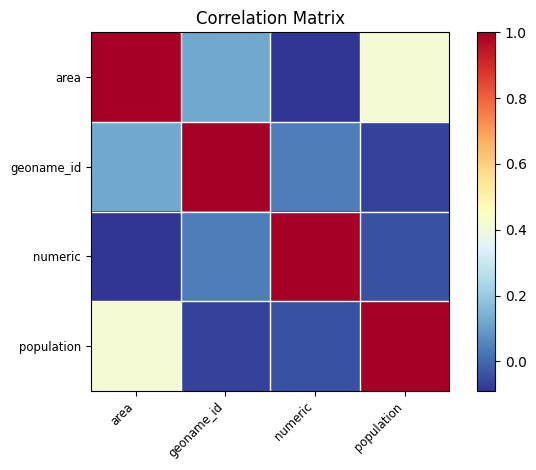

In [13]:
#Verifiquemos si hay correlación entre los datos
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.plot()


En este caso vemos baja correlación entre las variables (de 0.5 para abajo). Depende del algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación por varias razones:

- Reducción de la redundancia - Уменьшение избыточности
- Mejora de la interpretabilidad - Повышение интерпретируемости
- Evitar la multicolinealidad  - Предотвращение мультиколлинеарности
- Mejora del rendimiento del modelo - Улучшение производительности модели
- Acelerar el entrenamiento del modelo - Ускорение обучения модели

In [37]:
df2 = pd.read_csv('/content/drive/MyDrive/countries2.csv', sep=",")

In [43]:
#de este Dataframe vamos a extraer en un nuevo dataframe los valores solo de españa para analizarlos

df2_es = df2[df2['country'] =='Spain']
print(df2_es.head)

<bound method NDFrame.head of      country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161
1421   Spain  1977    36439000
1422   Spain  1982    37983310
1423   Spain  1987    38880702
1424   Spain  1992    39549438
1425   Spain  1997    39855442
1426   Spain  2002    40152517
1427   Spain  2007    40448191>


<Axes: >

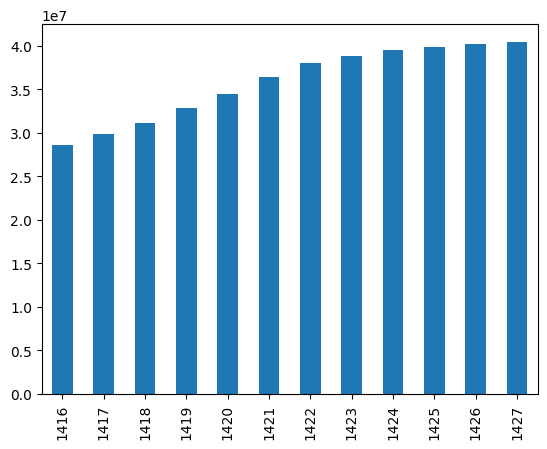

In [47]:
df2_es.drop(['country'],axis=1)['population'].plot(kind='bar')